# Random Search
>  In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Hyperparameter Tuning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)
from itertools import product

## Introducing Random Search

### Randomly Sample Hyperparameters

<div class=""><p>To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.</p>
<p>In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations preparation for running a random search. </p>
<p>You will use just the hyperparameters <code>learning_rate</code> and <code>min_samples_leaf</code> of the GBM algorithm to keep the example illustrative and not overly complicated.</p></div>

Instructions
<ul>
<li>Create a list of 200 values for the <code>learning_rate</code> hyperparameter between 0.01 and 1.5 and assign to the list <code>learn_rate_list</code>.</li>
<li>Create a list of values between 10 and 40 inclusive for the hyperparameter <code>min_samples_leaf</code> and assign to the list <code>min_samples_list</code>.</li>
<li>Combine these lists into a list of lists to sample from. </li>
<li>Randomly sample 250 models from these hyperparameter combinations and print the result.</li>
</ul>

In [ ]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
combinations_random_chosen[0:10]

[[1.3427638190954774, 34],
 [0.43678391959798996, 10],
 [0.33195979899497485, 28],
 [0.04743718592964824, 17],
 [0.04743718592964824, 20],
 [0.18969849246231157, 14],
 [0.2121608040201005, 15],
 [0.2421105527638191, 16],
 [0.8111557788944723, 30],
 [0.287035175879397, 33]]

**You generated some hyperparameter combinations and randomly sampled in that space. The output was not too nice though, in the next lesson we will use a much more efficient method for this. In a future lesson we will also make this output look much nicer!**

### Randomly Search with Random Forest

<div class=""><p>To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.</p>
<p>As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters <code>criterion</code>, <code>max_depth</code> and <code>max_features</code> of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search. </p>
<p>You will use a slightly different package for sampling in this task, <code>random.sample()</code>.</p></div>

In [ ]:
import random

Instructions
<ul>
<li>Create lists of the values <code>'gini'</code> and <code>'entropy'</code> for <code>criterion</code> &amp; <code>"auto", "sqrt", "log2", None</code> for <code>max_features</code>.</li>
<li>Create a list of values between 3 and 55 inclusive for the hyperparameter <code>max_depth</code> and assign to the list <code>max_depth_list</code>. Remember that <code>range(N,M)</code> will create a list from <code>N</code> to <code>M</code>-1.</li>
<li>Combine these lists into a list of lists to sample from using <code>product()</code>.</li>
<li>Randomly sample 150 models from the combined list and print the result.</li>
</ul>

In [ ]:
# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ["auto", "sqrt", "log2", None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
combinations_random_chosen[0:10]

[['entropy', 'sqrt', 26],
 ['entropy', 'sqrt', 31],
 ['entropy', 'auto', 14],
 ['gini', 'log2', 6],
 ['gini', None, 13],
 ['entropy', None, 17],
 ['gini', 'log2', 5],
 ['entropy', 'log2', 46],
 ['gini', 'sqrt', 54],
 ['gini', 'sqrt', 46]]

**This one was a bit harder but you managed to sample using text options and learned a new function to sample your lists.**

### Visualizing a Random Search

<div class=""><p>Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.</p>
<p>In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.</p>
<p>The function <code>sample_and_visualize_hyperparameters()</code> takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations. </p>
<p>If you want to see the function definition, you can use Python's handy <code>inspect</code> library, like so:</p>
<p><code>print(inspect.getsource(sample_and_visualize_hyperparameters))</code></p></div>

In [ ]:
def sample_and_visualize_hyperparameters(n_samples):
  # If asking for all combinations, just return the entire list.
  if n_samples == len(combinations_list):
    combinations_random_chosen = combinations_list
  else:
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
  # Pull out the X and Y to plot
  rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]
  
  # Plot 
  plt.clf() 
  plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
  plt.gca().set_xlim([0.01, 1.5])
  plt.gca().set_ylim([10, 29])
  plt.show()

In [ ]:
learn_rate_list = list(np.linspace(0.01, 1.5, 200))
min_samples_list = list(range(10, 30))
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

Instructions
<ul>
<li>Confirm how many possible hyperparameter combinations there are in <code>combinations_list</code> by assigning to the variable <code>number_combs</code> and print this out.</li>
<li>Sample and visualize 50, 500 and 1500 combinations. You will use a loop for succinctness. What do you notice about the visualization?</li>
<li>Now sample and visualize the entire set of combinations. You have already made a variable to assist with this. What does this look like?</li>
</ul>

4000


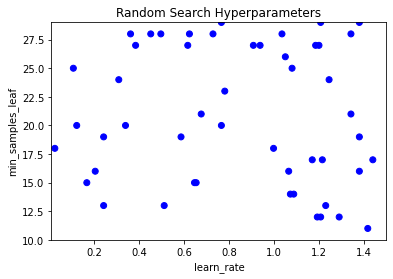

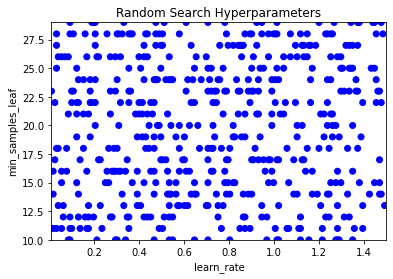

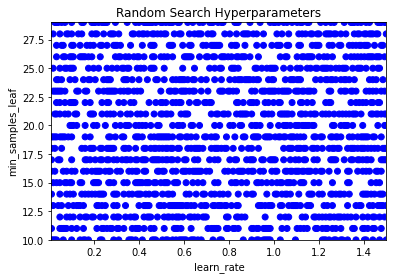

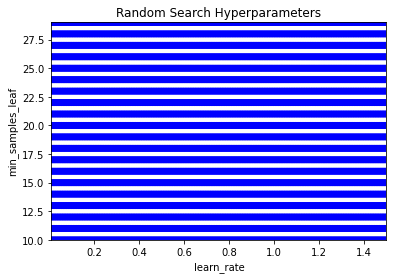

In [ ]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

**Those were some great viz you produced! Notice how the bigger your sample space of a random search the more it looks like a grid search? In a later lesson we will look closer at comparing these two methods side by side.**

## Random Search in Scikit Learn

### RandomSearchCV inputs

<div class=""><p>Let's test your knowledge of how <code>RandomizedSearchCV</code> differs from <code>GridSearchCV</code>.</p>
<p>You can check the documentation on Scitkit Learn's website to compare these two functions.</p>
<p>Which of these parameters is <em>only</em> for a <code>RandomizedSearchCV</code>?</p></div>

<pre>
Possible Answers
param_grid
n_jobs
best_estimator_
<b>n_iter</b>
</pre>

**RandomizedSearchCV asks you for how many models to sample from the grid you set.**

### The RandomizedSearchCV Object

<div class=""><p>Just like the <code>GridSearchCV</code> library from Scikit Learn, <code>RandomizedSearchCV</code> provides many useful features to assist with efficiently undertaking a random search. You're going to create a <code>RandomizedSearchCV</code> object, making the small adjustment needed from the <code>GridSearchCV</code> object.</p>
<p>The desired options are:</p>
<ul>
<li>A default Gradient Boosting Classifier Estimator</li>
<li>5-fold cross validation</li>
<li>Use accuracy to score the models</li>
<li>Use 4 cores for processing in parallel</li>
<li>Ensure you refit the best model and return training scores</li>
<li>Randomly sample 10 models</li>
</ul>
<p>The hyperparameter grid should be for <code>learning_rate</code> (150 values between 0.1 and 2) and <code>min_samples_leaf</code> (all values between and including 20 and 64).</p>
<p>You will have available <code>X_train</code> &amp; <code>y_train</code> datasets.</p></div>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/20-hyperparameter-tuning-in-python/datasets/credit-card-full.csv')
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
X = df.drop(['ID', 'default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Instructions
<ul>
<li>Create a parameter grid as specified in the context above.</li>
<li>Create a <code>RandomizedSearchCV</code> object as outlined in the context above.</li>
<li>Fit the <code>RandomizedSearchCV</code> object to the training data.</li>
<li>Print the values chosen by the modeling process for both hyperparameters.</li>
</ul>

In [ ]:
# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1,2,150), 'min_samples_leaf': list(range(20,65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter  = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.9798657718120805 1.1583892617449665 0.138255033557047
 1.3369127516778525 0.8651006711409396 0.43154362416107384
 0.3932885906040269 0.18926174496644296 1.6812080536912752
 1.2476510067114095]
[44 27 29 40 38 50 33 57 43 32]


**You have succesfully taken the knowledge gained from the grid search section and adjusted it to be able to run a random search. This is a very valuable tool to add to your Machine Learning Toolkit!**

## RandomSearchCV in Scikit Learn

<div class=""><p>Let's practice building a RandomizedSearchCV object using Scikit Learn.</p>
<p>The hyperparameter grid should be for <code>max_depth</code> (all values between and including 5 and 25) and <code>max_features</code> ('auto' and 'sqrt').</p>
<p>The desired options for the RandomizedSearchCV object are:</p>
<ul>
<li>A RandomForestClassifier Estimator with <code>n_estimators</code> of 80.</li>
<li>3-fold cross validation (<code>cv</code>)</li>
<li>Use <code>roc_auc</code> to <strong>score</strong> the models</li>
<li>Use 4 cores for processing in parallel (<code>n_jobs</code>)</li>
<li>Ensure you refit the best model and return training scores</li>
<li>Only sample 5 models for efficiency (<code>n_iter</code>)</li>
</ul>
<p><code>X_train</code> &amp; <code>y_train</code> datasets are loaded for you.</p>
<p>Remember, to extract the chosen hyperparameters these are found in <code>cv_results_</code> with a column per hyperparameter. For example, the column for the hyperparameter <code>criterion</code> would be <code>param_criterion</code>.</p></div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Instructions
<ul>
<li>Create a hyperparameter grid as specified in the context above.</li>
<li>Create a <code>RandomizedSearchCV</code> object as outlined in the context above.</li>
<li>Fit the <code>RandomizedSearchCV</code> object to the training data.</li>
<li>Index into the <code>cv_results_</code> object to print the values chosen by the modeling process for both hyperparameters (<code>max_depth</code> and <code>max_features</code>).</li>
</ul>

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[22 25 14 13 19]
['sqrt' 'auto' 'auto' 'sqrt' 'sqrt']


**You adapted your knowledge to a new algorithm and set of hyperparameters and values. Being able to transpose your knowledge to new situations is an invaluable skill - excellent!**

## Comparing Grid and Random Search

### Comparing Random & Grid Search

<div class=""><p>In the video, you just studied some of the advantages and disadvantages of random search as compared to grid search.</p>
<hr>
<p>Which of the following is an advantage of random search?</p></div>

<pre>
Possible Answers
It exhaustively searches all possible hyperparameter combinations, so is guaranteed to find the best model within the specified grid.
It doesn't matter what grid you sample from, it will still find the best model.
There are no advantages, it is worse than Grid Search.
<b>It is more computationally efficient than Grid Search.</b>
</pre>

**As you saw in the slides, random search tests a larger space of values so is more likely to get close to the best score, given the same computational resources as Grid Search.**

### Grid and Random Search Side by Side

<div class=""><p>Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.</p>
<p>In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.</p>
<p>You will have available:</p>
<ul>
<li><code>combinations_list</code> which is a list of combinations of <code>learn_rate</code> and <code>min_samples_leaf</code> for this algorithm</li>
<li>The function <code>visualize_search()</code> which will make your hyperparameter combinations into X and Y coordinates and plot both grid and random search combinations on the same graph. It takes as input two lists of hyperparameter combinations.</li>
</ul></div>

In [25]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim([0.01, 3.0])
  plt.gca().set_ylim([5, 25])
  plt.show()

In [8]:
learn_rate_list = np.linspace(0.01, 3.0, 200)
min_samples_leaf_list = range(5, 25)
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

Instructions 1/4
<li>Sample (by slicing) 300 hyperparameter combinations for a grid search from <code>combinations_list</code> into two lists and print the result.</li>

In [13]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
grid_combinations_chosen[0:8]

[[0.01, 5],
 [0.01, 6],
 [0.01, 7],
 [0.01, 8],
 [0.01, 9],
 [0.01, 10],
 [0.01, 11],
 [0.01, 12]]

Instructions 2/4
<ul>
<li>Let's randomly sample too. Create a list of every index in <code>combinations_list</code> to sample from using <code>range()</code></li>
<li>Use <code>np.random.choice()</code> to sample 300 combinations. The first two arguments are a list to sample from and the number of samples.</li>
</ul>

In [14]:
# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

Instructions 3/4
<li>Now use the list of random indexes to index into <code>combinations_list</code> using a list comprehension.</li>

In [15]:
# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

Instructions 4/4
# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

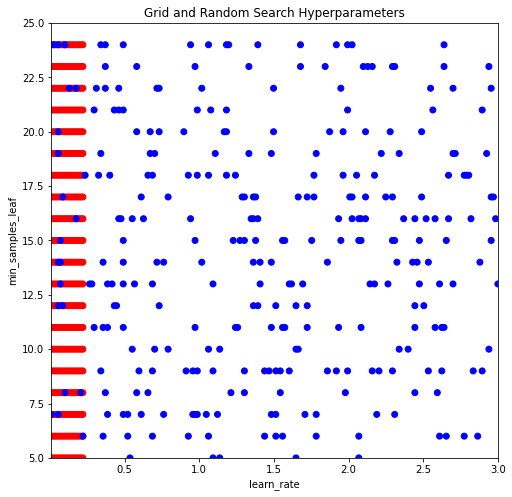

In [26]:
# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

**That is a great viz you produced! You can really see how a grid search will cover a small area completely whilst random search will cover a much larger area but not completely.**